# Quantum Computer
<p>A quantum computer is a type of computer that uses the strange rules of quantum mechanics to process information. Unlike a regular computer, which stores data in bits that are either 0 or 1, a quantum computer uses quantum bits, or qubits, which can be both 0 and 1 at the same time (this is called superposition)<p>

Two key principles that make quantum computers special are:

<b>Superposition</b> — A qubit can exist in multiple states at once (not just 0 or 1, but a blend of both).</br>
<b>Entanglement</b> — Qubits can become linked so that the state of one affects the other, no matter how far apart they are.

In [1]:
from qiskit import __version__
print(__version__)

2.1.1


# Quantun Information
<p>
A quantum state of a system is represented by a column vector, similar to a probabilistic state. As before, the indices of the vector label the classical states of the system. Vectors representing quantum states are characterized by these two properties:


<ul>
<li>The entries of a quantum state vector are complex numbers.</li>
<li>The sum of the absolute values squared of the entries of a quantum state vector is 1</li>
</ul>
</p>

In [2]:
import numpy as np

ket0 = np.array([[1],[0]])
ket1 = np.array([[0],[1]])

print(ket0 / 2 + ket1 / 2)

[[0.5]
 [0.5]]


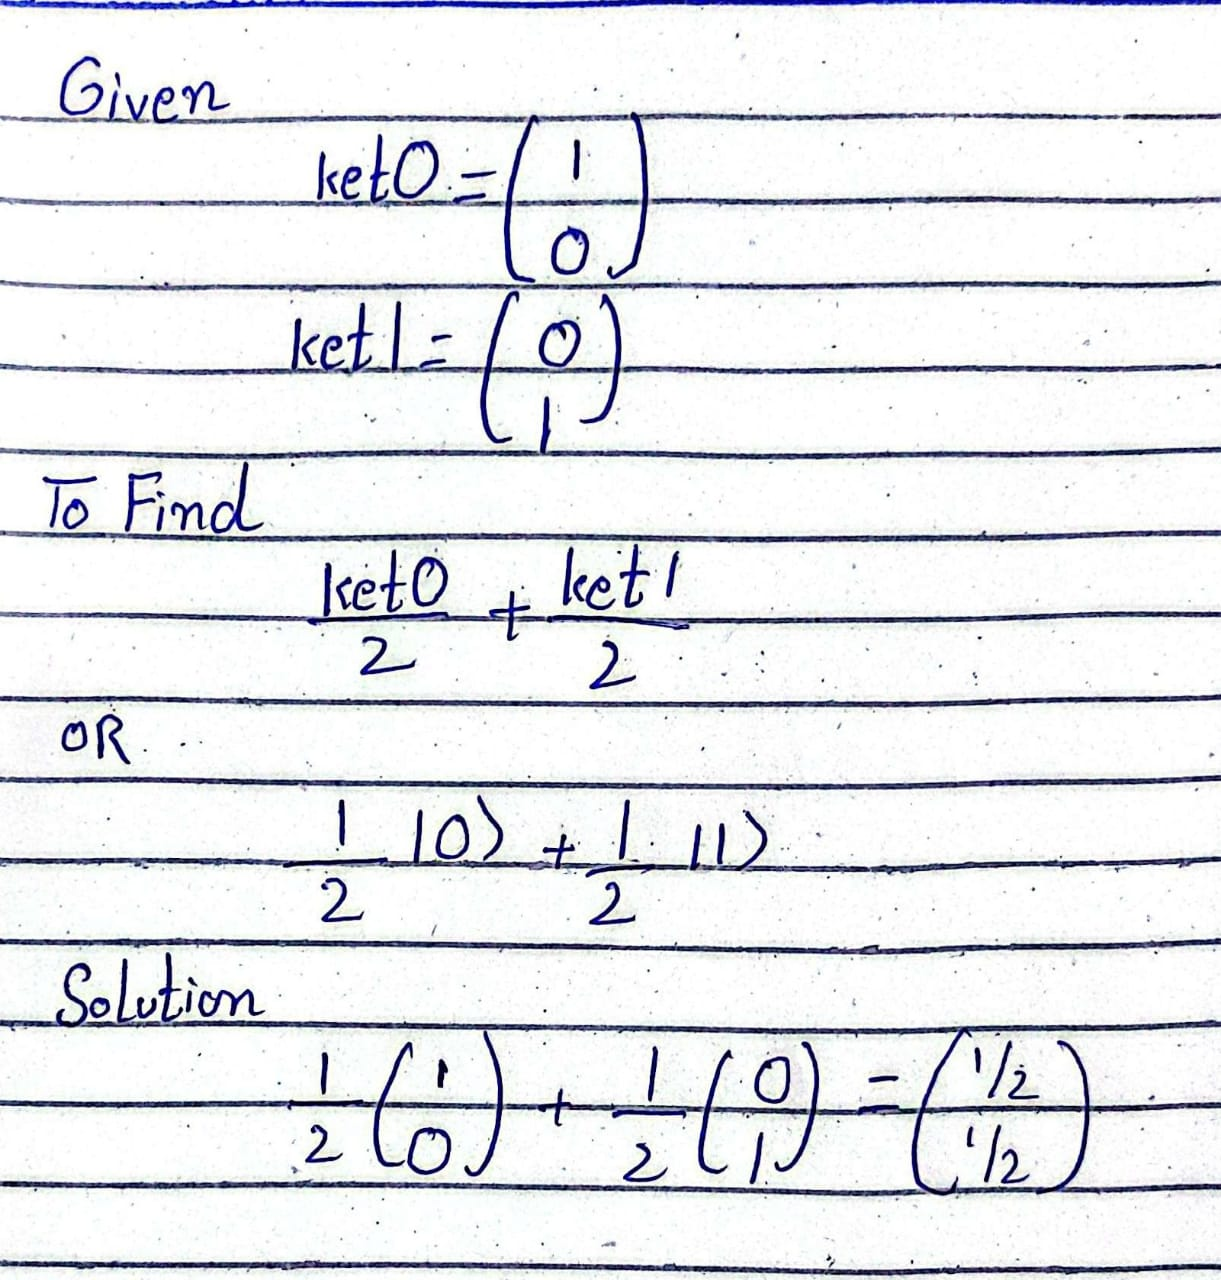

In [4]:
from IPython.display import Image, display

display(Image(filename=r'D:\Quantum Computer\basics\images\pic1.jpg', width=500, height=500))


In [5]:
M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 0], [0, 1]])
M = M1 / 2 + M2 / 2
print(M)

[[1.  0.5]
 [0.  0.5]]


In [6]:
print(np.matmul(M1, ket1))
print(np.matmul(M1, M2))
print(np.matmul(M, M))

[[1]
 [0]]
[[1 1]
 [0 0]]
[[1.   0.75]
 [0.   0.25]]


## **Pauli Operations**
The Pauli matrices are four fundamental unitary operations: <br>

$$
I = \begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}, \quad
X = \begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}, \quad
Y = \begin{pmatrix}
0 & i \\
-i & 0
\end{pmatrix}, \quad
Z = \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}.
$$
<ul>
<li>
The X gate flips qubits (bit-flip), turning ∣0⟩into ∣1⟩ and vice versa.</li>

<li>
The Z gate flips the phase of ∣1⟩ (adds a minus sign), known as a phase flip.</li>

</ul>

## **Hadamard Operation (H)**
The Hadamard gate:
$$
H = \frac{1}{\sqrt{2}} 
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
$$
creates superpositions, turning basis states into equal mixtures.

## **Phase Operations (Pθ)**
The **Phase gate** \( P_\theta \) adds a phase shift to the state \(\lvert 1 \rangle\):

$$
P_\theta =
\begin{pmatrix}
1 & 0 \\[6pt]
0 & e^{i \theta}
\end{pmatrix}
$$

**Special cases:**

- **S gate:**  
$$
P_{\pi/2} =
\begin{pmatrix}
1 & 0 \\
0 & i
\end{pmatrix}
$$

- **T gate:**  
$$
P_{\pi/4} =
\begin{pmatrix}
1 & 0 \\[6pt]
0 & \dfrac{1+i}{\sqrt{2}}
\end{pmatrix}
$$

- **Z gate:** 
$$
P_{\pi} =
\begin{pmatrix}
1 & 0 \\[6pt]
0 & -1
\end{pmatrix}
$$

These unitary gates form the building blocks for manipulating qubits in quantum circuits.


<hr/>

**Note:**

$$
H\,|0\rangle = |+\rangle
$$

$$
H\,|1\rangle = |-\rangle
$$

$$
H\,|+\rangle = |0\rangle
$$

$$
H\,|-\rangle = |1\rangle
$$


In [7]:
from qiskit.visualization import array_to_latex

display(array_to_latex(np.matmul(M1, ket1)))
display(array_to_latex(np.matmul(M1, M2)))
display(array_to_latex(np.matmul(M, M)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [8]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

In [9]:
display(u.draw("text"))
display(u.draw("latex"))
print(u.draw("latex_source"))

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

\frac{\sqrt{2}}{2} |0\rangle+\frac{\sqrt{2}}{2} |1\rangle


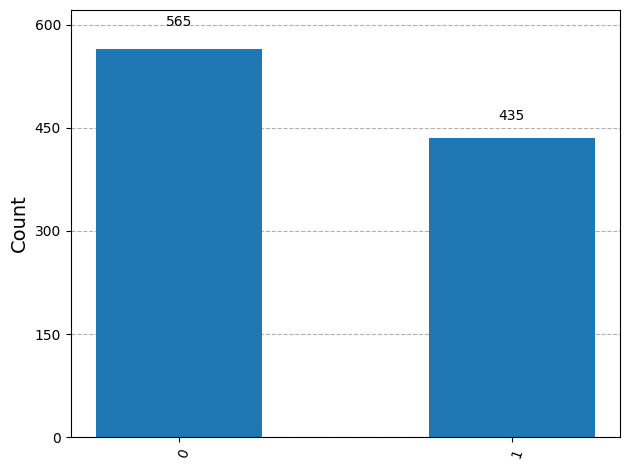

In [10]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
plot_histogram(statistics)

In [11]:
from qiskit.quantum_info import Operator

Y = Operator([[0, -1.0j], [1.0j, 0]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

In [12]:
display(Y.draw("latex"))
display(H.draw("latex"))
display(S.draw("latex"))
display(T.draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [13]:
v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(S)
v = v.evolve(Y)

display(v.draw("latex"))

<IPython.core.display.Latex object>

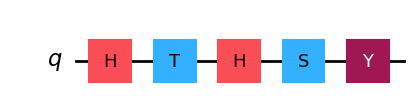

In [14]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.s(0)
circuit.y(0)

display(circuit.draw(output="mpl"))

In [15]:
display(Operator.from_circuit(circuit).draw("latex"))

<IPython.core.display.Latex object>

In [16]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
display(v.draw("latex"))

<IPython.core.display.Latex object>

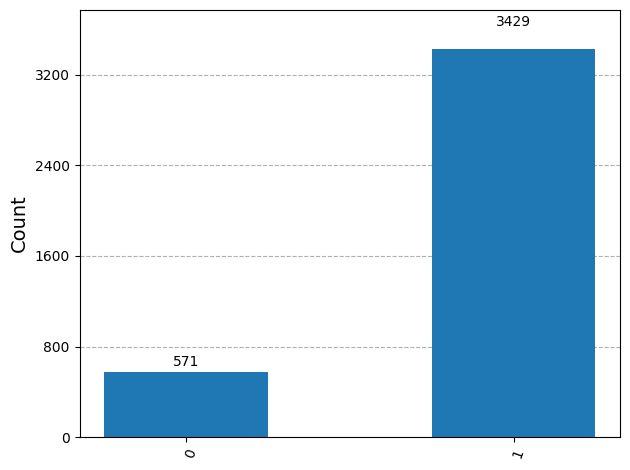

In [17]:
statistics = v.sample_counts(4000)
display(plot_histogram(statistics))

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

ket_0 = Statevector.from_label('0')
ket_1 = Statevector.from_label('1')

print("Ket |0> =", ket_0)
print("Ket |1> =", ket_1)

Ket |0> = Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
Ket |1> = Statevector([0.+0.j, 1.+0.j],
            dims=(2,))
